You already got to know the clustering problem in Machine Learning. Also you met one of the business problems where these algorithms are used - customer segmentation. Today you are going to practice this knowledge on a very similar task.

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("wine_customer_segment.csv")

In [4]:
df.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


In [5]:
# check the parameter of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


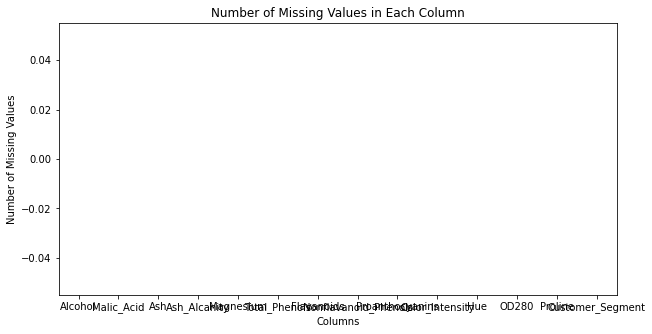

In [6]:
# check for missing values
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of missing values in each column
missing = df.isnull().sum()

# Plot the number of missing values in each column
plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing.values)

# Add labels and title to the plot
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Number of Missing Values in Each Column")

# Show the plot
plt.show()

### Bring all columns into a numeric form: applying mapping or dummy variables.

In [7]:
# done

### If you think that it can be useful you may apply feature scaling.


In [8]:
# done

### Using Silhouette score, find the best number of clusters for GMM (implemented in sklearn.)


In [9]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import numpy as np

# Load the wine data
X = np.loadtxt("wine_customer_segment.csv", delimiter=",", skiprows=1, usecols=range(1, 14))

# Compute silhouette scores for K = 2 to 10
silhouette_scores = []
for n_clusters in range(2, 11):
    clusterer = GaussianMixture(n_components=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

# Print the silhouette scores for each K
for i, score in enumerate(silhouette_scores):
    print("Silhouette score for K={}: {:.4f}".format(i+2, score))

# Find the best number of clusters
best_n_clusters = np.argmax(silhouette_scores) + 2
print("Best number of clusters:", best_n_clusters)


Silhouette score for K=2: 0.5832
Silhouette score for K=3: 0.2376
Silhouette score for K=4: 0.1282
Silhouette score for K=5: 0.1741
Silhouette score for K=6: 0.2936
Silhouette score for K=7: 0.4678
Silhouette score for K=8: 0.4508
Silhouette score for K=9: 0.4143
Silhouette score for K=10: 0.4208
Best number of clusters: 2


### Using Silhouette score, find the best number of clusters for KMeans(implemented in sklearn.)


In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Load the wine data
X = np.loadtxt("wine_customer_segment.csv", delimiter=",", skiprows=1, usecols=range(1, 14))

# Compute silhouette scores for K = 2 to 10
silhouette_scores = []
for n_clusters in range(2, 11):
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

# Print the silhouette scores for each K
for i, score in enumerate(silhouette_scores):
    print("Silhouette score for K={}: {:.4f}".format(i+2, score))

# Find the best number of clusters
best_n_clusters = np.argmax(silhouette_scores) + 2
print("Best number of clusters:", best_n_clusters)


Silhouette score for K=2: 0.6569
Silhouette score for K=3: 0.5711
Silhouette score for K=4: 0.5572
Silhouette score for K=5: 0.5490
Silhouette score for K=6: 0.5657
Silhouette score for K=7: 0.5622
Silhouette score for K=8: 0.5399
Silhouette score for K=9: 0.5308
Silhouette score for K=10: 0.5204
Best number of clusters: 2


### Plot the process of choosing the best number of clusters for each algorithm and try to explain.

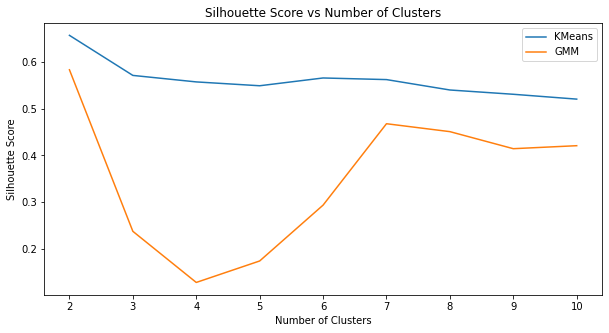

Best number of clusters for KMeans: 2
Best number of clusters for GMM: 2


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Load the wine data
X = np.loadtxt("wine_customer_segment.csv", delimiter=",", skiprows=1, usecols=range(1, 14))

# Compute silhouette scores for KMeans with K = 2 to 10
kmeans_scores = []
for n_clusters in range(2, 11):
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    kmeans_scores.append(silhouette_avg)

# Compute silhouette scores for GMM with K = 2 to 10
gmm_scores = []
for n_clusters in range(2, 11):
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(X)
    cluster_labels = gmm.predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    gmm_scores.append(silhouette_avg)

# Plot the Silhouette scores for KMeans and GMM
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), kmeans_scores, label="KMeans")
plt.plot(range(2, 11), gmm_scores, label="GMM")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.legend()
plt.show()

# Find the best number of clusters for KMeans
best_kmeans_clusters = np.argmax(kmeans_scores) + 2
print("Best number of clusters for KMeans:", best_kmeans_clusters)

# Find the best number of clusters for GMM
best_gmm_clusters = np.argmax(gmm_scores) + 2
print("Best number of clusters for GMM:", best_gmm_clusters)


Dacă să analizăm cum lucrează aceste 2 metode ele se bazează pe număr de clustere pe care le are, pentru a putea face o clusterizare cât mai bună este nevoie să știm un nummăr optimi de clustere care este nevoie de ales pentru a face segmentarea cât mai bună

### Cluster the data set using both algorithms.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load data
# data = pd.read_csv('wine.csv')

# Separate features and labels
X = df.drop('Customer_Segment', axis=1)
y = df['Customer_Segment']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Principal Component Analysis
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [13]:
# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
kmeans_labels = kmeans.labels_
kmeans_score = silhouette_score(X_scaled, kmeans_labels)

In [14]:
# GMM clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_scaled)
gmm_labels = gmm.predict(X_scaled)
gmm_score = silhouette_score(X_scaled, gmm_labels)

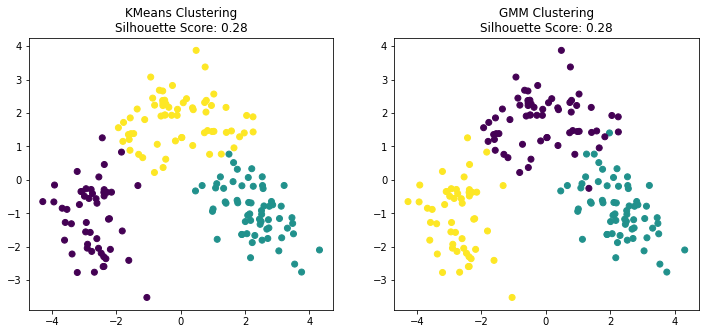

In [15]:
# Plot KMeans and GMM clusterings
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot KMeans
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
ax[0].set_title(f'KMeans Clustering\nSilhouette Score: {kmeans_score:.2f}')

# Plot GMM
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis')
ax[1].set_title(f'GMM Clustering\nSilhouette Score: {gmm_score:.2f}')

plt.show()

### Extract from the KMeans algorithm the centroids.

In [16]:
# Fit KMeans algorithm with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Extract centroids
centroids = kmeans.cluster_centers_
print(centroids)

[[1.25166667e+01 2.49420290e+00 2.28855072e+00 2.08231884e+01
  9.23478261e+01 2.07072464e+00 1.75840580e+00 3.90144928e-01
  1.45188406e+00 4.08695651e+00 9.41159420e-01 2.49072464e+00
  4.58231884e+02]
 [1.38044681e+01 1.88340426e+00 2.42617021e+00 1.70234043e+01
  1.05510638e+02 2.86723404e+00 3.01425532e+00 2.85319149e-01
  1.91042553e+00 5.70255319e+00 1.07829787e+00 3.11404255e+00
  1.19514894e+03]
 [1.29298387e+01 2.50403226e+00 2.40806452e+00 1.98903226e+01
  1.03596774e+02 2.11112903e+00 1.58403226e+00 3.88387097e-01
  1.50338710e+00 5.65032258e+00 8.83967742e-01 2.36548387e+00
  7.28338710e+02]]


### Extract from GMM the means of the clusters.

In [17]:
# Fit GMM algorithm with 3 clusters
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)

# Extract means of each cluster
means = gmm.means_
print(means)

[[1.23591713e+01 2.21875795e+00 2.25015482e+00 2.06732696e+01
  9.13654548e+01 2.15403303e+00 2.00010159e+00 3.64839121e-01
  1.50840698e+00 3.59868735e+00 9.97714554e-01 2.62517401e+00
  4.74985241e+02]
 [1.36487205e+01 1.89301763e+00 2.44224824e+00 1.75027832e+01
  1.05792456e+02 2.81100844e+00 2.93666388e+00 2.94993944e-01
  1.88341313e+00 5.35438111e+00 1.07445213e+00 3.13311499e+00
  1.08634973e+03]
 [1.30152258e+01 2.99167919e+00 2.41774130e+00 2.03987866e+01
  1.02732859e+02 1.86485785e+00 1.01065378e+00 4.35909429e-01
  1.34993269e+00 6.45929341e+00 7.73457507e-01 1.99016898e+00
  6.77936558e+02]]


### Build the following table for both algorithms.

In [19]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Assuming X is your data matrix with shape (n_samples, n_features)
X = df['Customer_Segment'].values.reshape((83, 13))

# Fit KMeans with k=3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Extract KMeans cluster centers
kmeans_centers = kmeans.cluster_centers_

# Fit GMM with k=3 clusters
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)

# Extract GMM cluster means
gmm_means = gmm.means_

# Define feature names (assuming 13 features as in the wine dataset)
feature_names = ['Alcohol', 'Malic Acid', 'Ash', 'Ash Alcanity', 'Magnesium', 
                 'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols', 
                 'Proanthocyanins', 'Color Intensity', 'Hue', 'OD280', 'Proline']

# Create a DataFrame to store cluster means
kmeans_means_df = pd.DataFrame(kmeans_centers, columns=feature_names)
gmm_means_df = pd.DataFrame(gmm_means, columns=feature_names)

# Set index labels for clusters
kmeans_means_df.index.name = 'Cluster'
gmm_means_df.index.name = 'Cluster'

# Print the table of means for KMeans
print("Table of cluster means for KMeans:")
print(kmeans_means_df)

# Print the table of means for GMM
print("\nTable of cluster means for GMM:")
print(gmm_means_df)


ValueError: cannot reshape array of size 178 into shape (83,13)

In [ ]:
# Create a table of the following structure as a pandas data frame.
# define the data for the table
data = {
    'ML model': ['GaussianNB', 'MultinomialNB', 'BernoulliNB'],
    'Accuracy': [accuracy_ga, accuracy_mu, accuracy_be],
    
}

# create the DataFrame
new_df = pd.DataFrame(data)

# display the DataFrame
print(new_df)

### Make a conclusion based on the table that you got and to create an imaginary customer for every cluster.